In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# store csv data
df = pd.read_csv(r"C:\Users\user\Downloads\Students_Grading_Dataset_Biased.csv")  # biased data

student_df = pd.read_csv(r"C:\Users\user\Downloads\Students_Grading_Dataset.csv")   # original data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [4]:
# info and head
student_df.info()
student_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


In [5]:
# column 
student_df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [6]:
# checking null cells
student_df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

#### findings
 - age column have 21 larger and 20 smaller but ther no need change closely ley simmilar
 - attendance  min is 50.somthing and max is 100
 - Midterm_Score not strongs changes but lower 40 and higher 99.99
 - final score not strong changes and lower 40 and high is 99.9
 - all numerical data column are same  just range different like 40-100, 50-100, 60-90
 - department similar dustribution 
 - internat acess similar distribution
 - extracuricular similar distribution
 - income level simmilar distribution
 - parents ed have some missing values

## problems
- not possible to add midterm, final score, assignment avg, quizzes avg, participation score and   project score ther avg may or may not be  total score because we don't know  the distribution

# feacture enginering 
- new column of full name by first and last name


# Univariate

In [7]:
# describe of columns
columns = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score','Projects_Score', 'Total_Score','Sleep_Hours_per_Night','Study_Hours_per_Week', 'Stress_Level (1-10)']
for col in columns:
    print(student_df[col].describe())

count    5000.000000
mean       21.048400
std         1.989786
min        18.000000
25%        19.000000
50%        21.000000
75%        23.000000
max        24.000000
Name: Age, dtype: float64
count    5000.000000
mean       75.356076
std        14.392716
min        50.010000
25%        62.945000
50%        75.670000
75%        87.862500
max       100.000000
Name: Attendance (%), dtype: float64
count    5000.000000
mean       70.701924
std        17.436325
min        40.000000
25%        55.707500
50%        70.860000
75%        85.760000
max        99.990000
Name: Midterm_Score, dtype: float64
count    5000.000000
mean       69.546552
std        17.108996
min        40.010000
25%        54.697500
50%        69.485000
75%        83.922500
max        99.980000
Name: Final_Score, dtype: float64
count    5000.000000
mean       74.956320
std        14.404287
min        50.000000
25%        62.340000
50%        75.090000
75%        87.352500
max        99.990000
Name: Assignments_Avg, dtyp

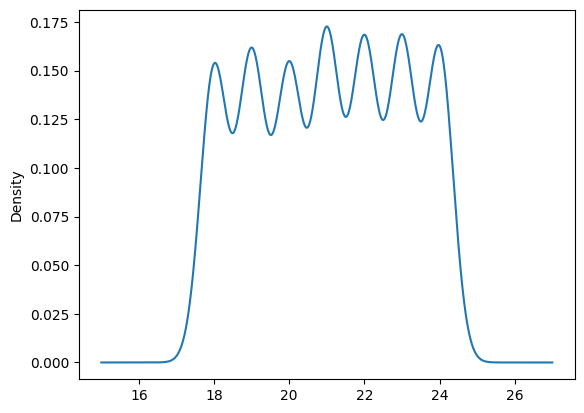

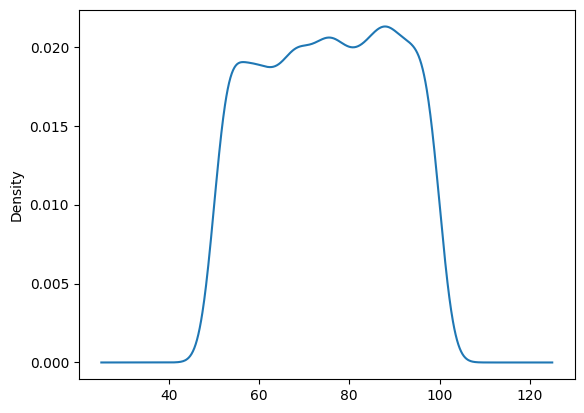

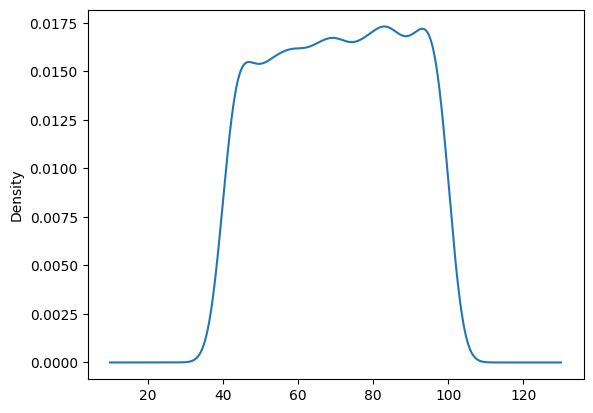

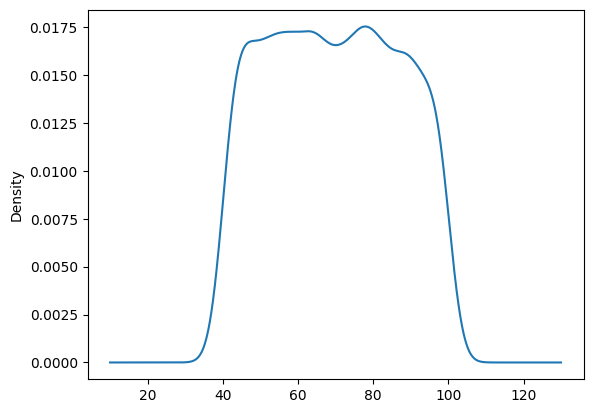

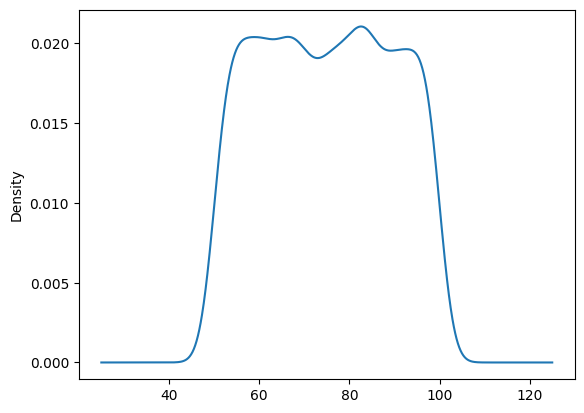

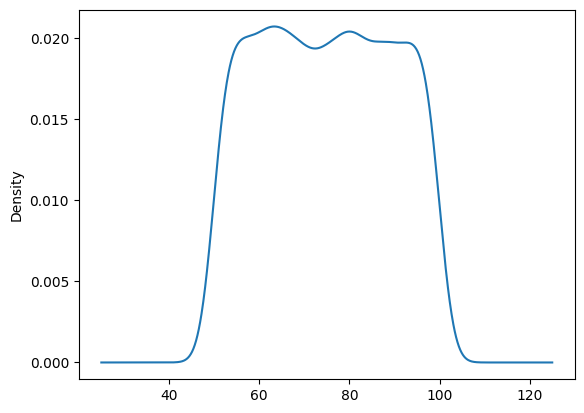

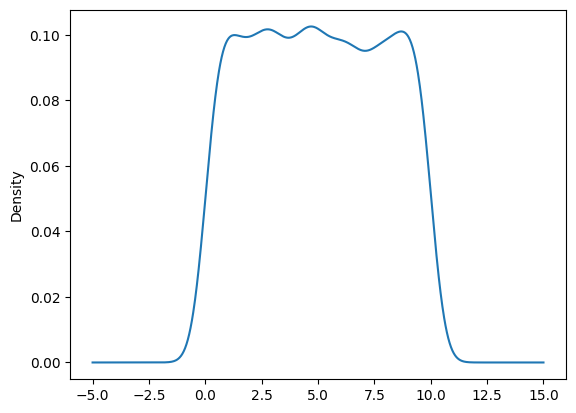

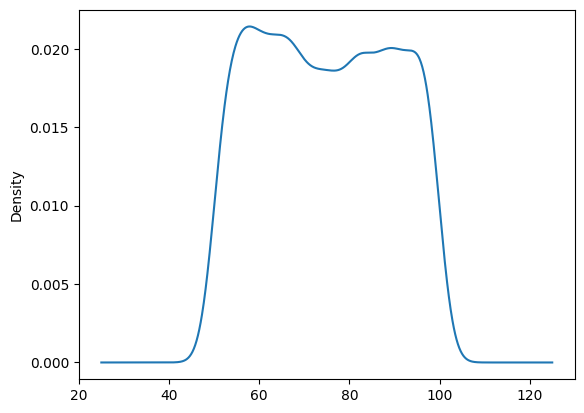

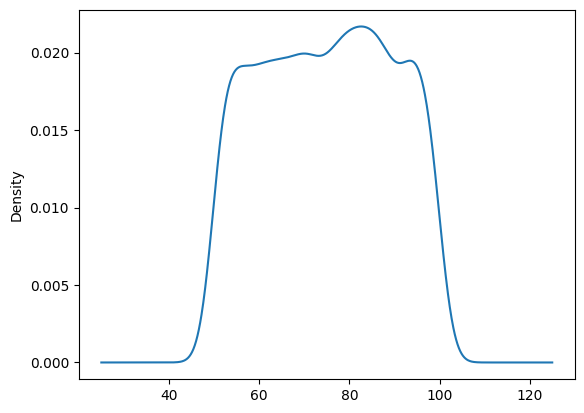

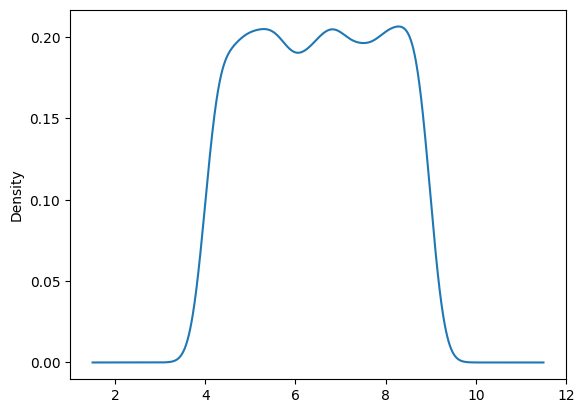

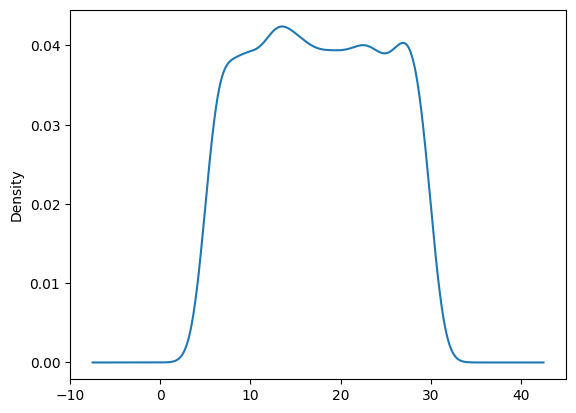

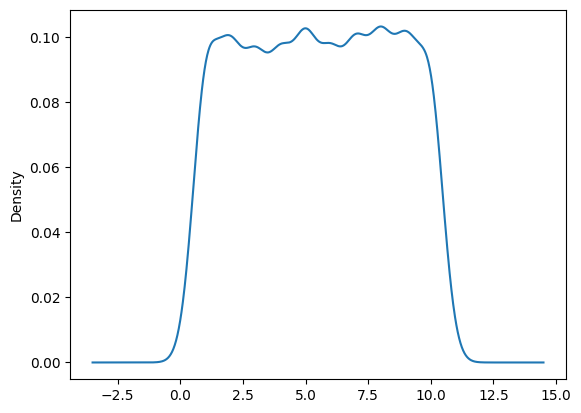

In [8]:
columns = ['Age', 'Attendance (%)','Midterm_Score','Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score','Projects_Score', 'Total_Score','Sleep_Hours_per_Night','Study_Hours_per_Week', 'Stress_Level (1-10)']
for col in columns:
    student_df[col].plot(kind='kde')
    plt.show()

# categorials

In [9]:
cat_columns = ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender','Department','Extracurricular_Activities', 'Internet_Access_at_Home','Parent_Education_Level', 'Family_Income_Level','Grade']
for col in cat_columns:
    print(student_df[col].value_counts())

Student_ID
S1000    1
S4330    1
S4337    1
S4336    1
S4335    1
        ..
S2666    1
S2665    1
S2664    1
S2663    1
S5999    1
Name: count, Length: 5000, dtype: int64
First_Name
Maria    657
Ahmed    651
Ali      644
Emma     628
Sara     612
John     608
Omar     601
Liam     599
Name: count, dtype: int64
Last_Name
Johnson     868
Jones       850
Davis       829
Brown       825
Smith       817
Williams    811
Name: count, dtype: int64
Email
student0@university.com       1
student3330@university.com    1
student3337@university.com    1
student3336@university.com    1
student3335@university.com    1
                             ..
student1666@university.com    1
student1665@university.com    1
student1664@university.com    1
student1663@university.com    1
student4999@university.com    1
Name: count, Length: 5000, dtype: int64
Gender
Male      2551
Female    2449
Name: count, dtype: int64
Department
Engineering    1274
Business       1264
CS             1239
Mathematics    1223
Nam

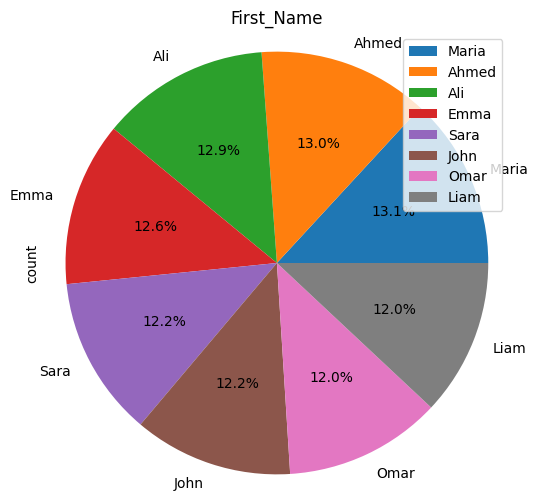

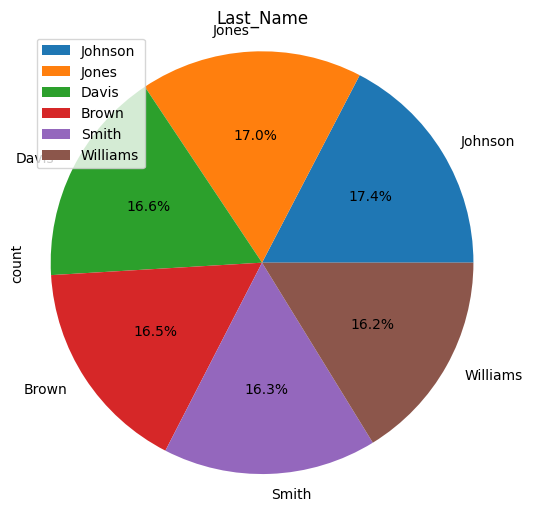

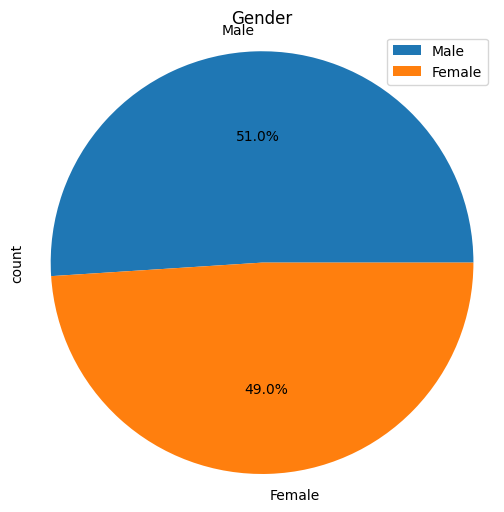

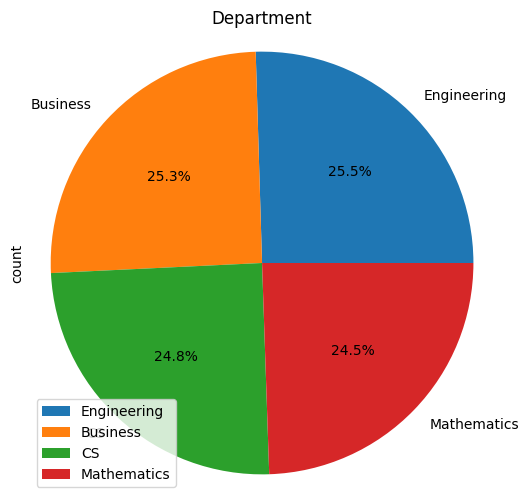

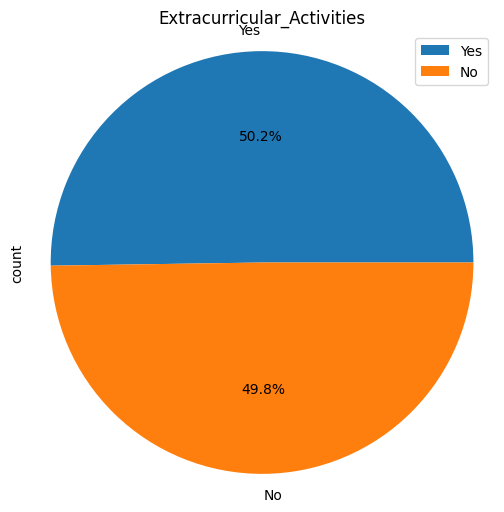

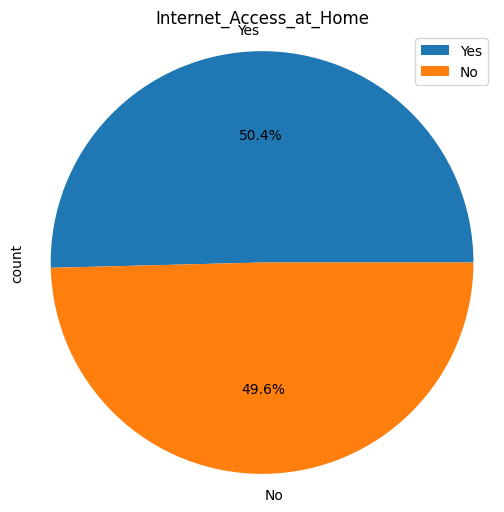

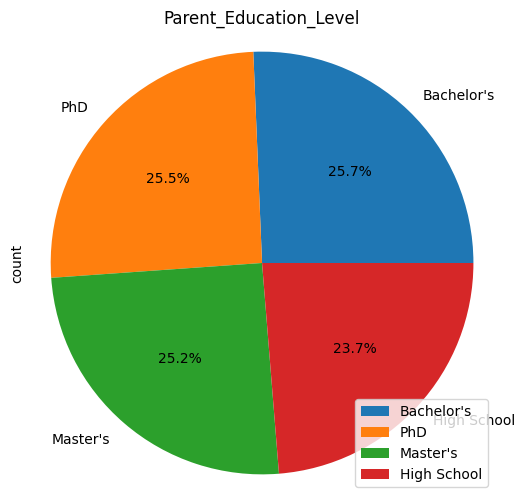

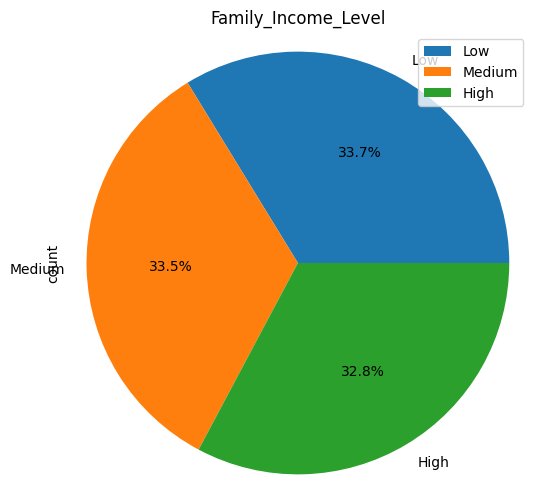

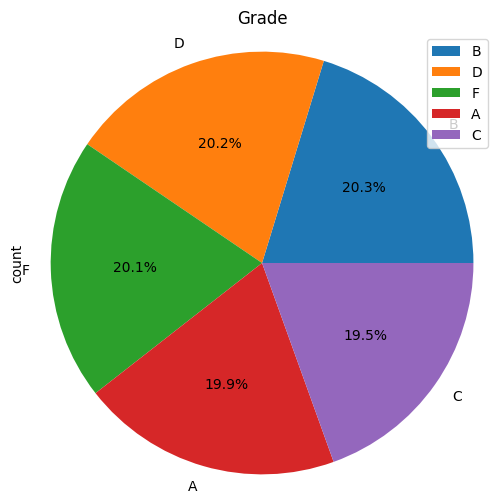

In [10]:
cat_columns = [ 'First_Name', 'Last_Name', 'Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home','Parent_Education_Level', 'Family_Income_Level','Grade']
for col in cat_columns:
    count = student_df[col].value_counts()
    count.plot(kind = 'pie', autopct='%1.1f%%',figsize=(6,6))
    plt.title(f'{col}')
    plt.axis('equal')
    plt.legend()
    plt.show()

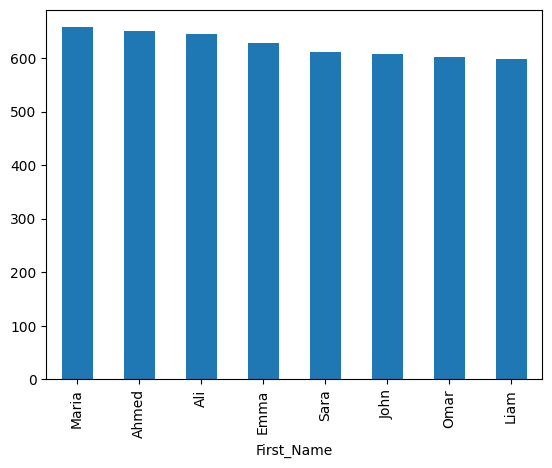

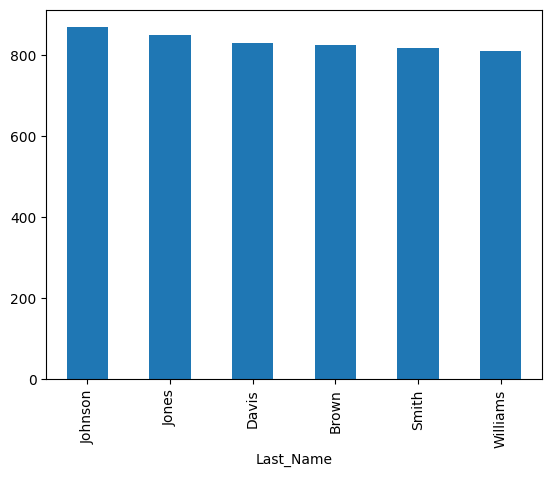

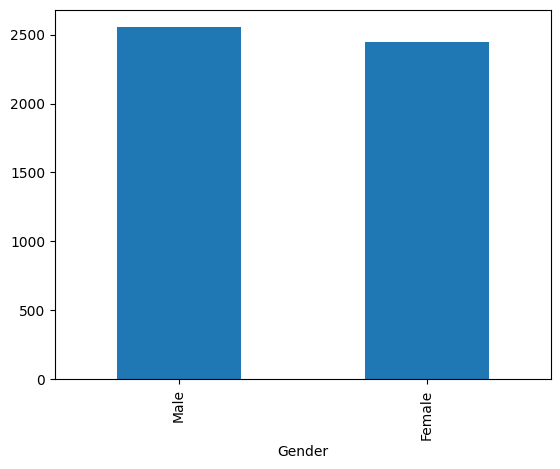

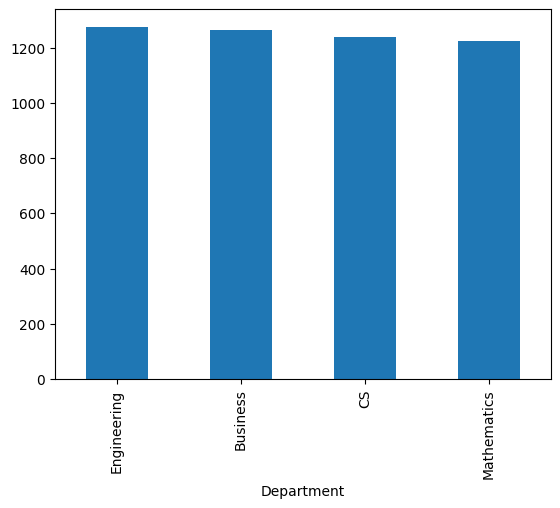

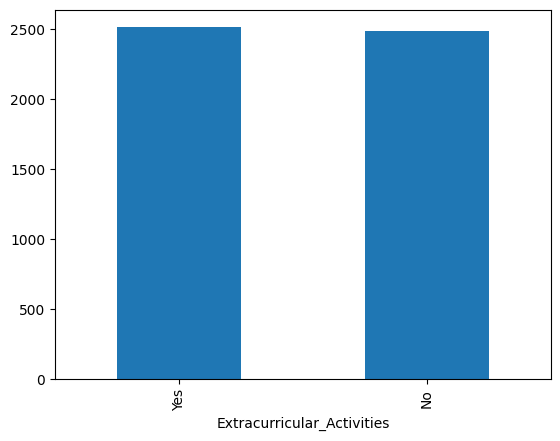

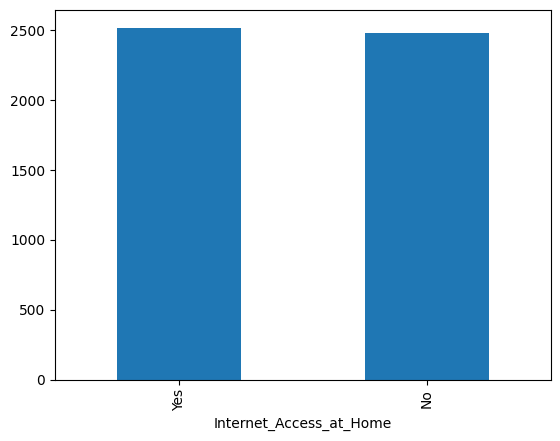

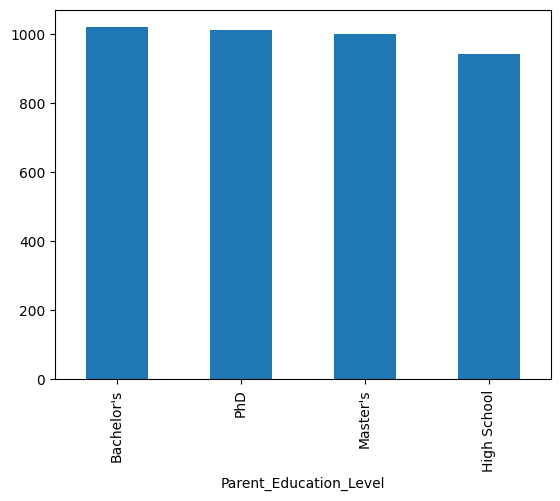

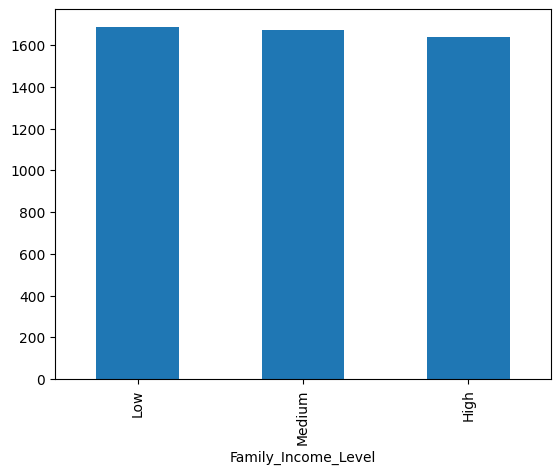

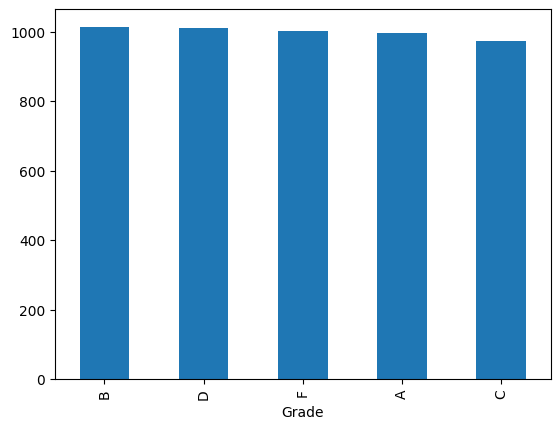

In [11]:
cat_columns = ['First_Name', 'Last_Name', 'Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home','Parent_Education_Level', 'Family_Income_Level','Grade']
for col in cat_columns:
    count = student_df[col].value_counts()
    count.plot(kind='bar')
    plt.show()

In [12]:
cat_columns = ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home','Parent_Education_Level', 'Family_Income_Level','Grade']
for col in cat_columns:
    print(student_df[col].isnull().sum(),col)

0 Student_ID
0 First_Name
0 Last_Name
0 Email
0 Gender
0 Department
0 Extracurricular_Activities
0 Internet_Access_at_Home
1025 Parent_Education_Level
0 Family_Income_Level
0 Grade


In [13]:
# check the total score
total = student_df[['Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score']].mean(axis=1)  # calculate average of all scores
print((total==student_df['Total_Score']).all())  # check all values of total and total score are same or note

False


# Multivariate

In [14]:
new_df =student_df.copy()
new_df['First_Name'] = new_df['First_Name'].map({'Omar':0, 'Maria':1, 'Ahmed':2, 'John':3, 'Liam':4, 'Sara':5, 'Emma':6, 'Ali':7})
new_df['Last_Name'] = new_df['Last_Name'].map({'Williams':0, 'Brown':1, 'Jones':2, 'Smith':3, 'Davis':4, 'Johnson':5})
new_df['Department'] = new_df['Department'].map({'Mathematics':0, 'Business':1, 'Engineering':2, 'CS':3})
new_df['Extracurricular_Activities'] = new_df['Extracurricular_Activities'].map({'Yes':0, 'No':1})
new_df['Internet_Access_at_Home'] = new_df['Internet_Access_at_Home'].map({'Yes':0, 'No':1})
new_df['Grade'] = new_df['Grade'].map({'A':0, 'B':1, 'C':2, 'D':3, 'F':4})
new_df['Gender'] = new_df['Gender'].map({'Male':0, 'Female':1})

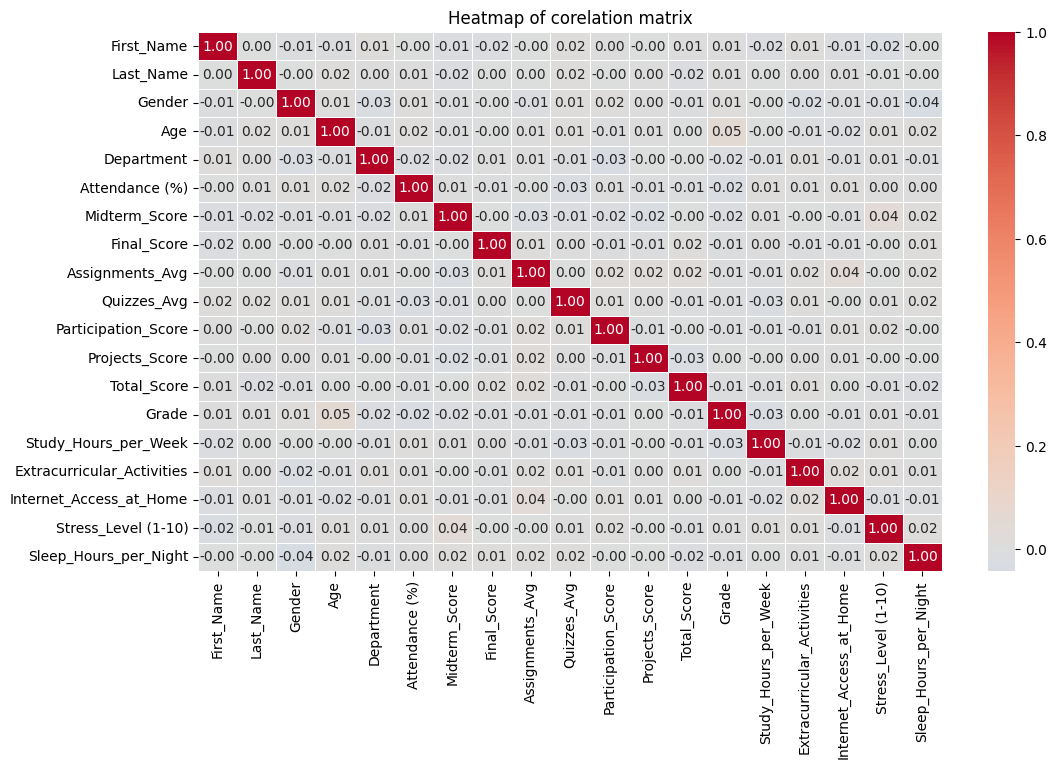

In [15]:
# correlation matrix
corr_matrix = new_df.select_dtypes(include=np.number).corr()
# heat map
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot = True, fmt ='.2f',cmap='coolwarm', center=0, linewidths = 0.5)
plt.title('Heatmap of corelation matrix')
plt.show()

## it clearly show that there is no relation betwen any of the above columns


In [17]:
# Feacture Engerning
student_df['Full_name'] = student_df['First_Name'] + student_df['Last_Name']

# adding missing values

In [18]:
features = ['Midterm_Score', 'Final_Score', 'Assignments_Avg',
            'Quizzes_Avg', 'Participation_Score', 'Projects_Score']

# Now drop rows with missing values in features or Total_Score
df_cleaned = student_df.dropna(subset=features + ['Total_Score'])

# Split into X (features) and y (target)
X = df_cleaned[features]
y = df_cleaned['Total_Score']
print(X.isnull().sum())
print(y.isnull().sum())

Midterm_Score          0
Final_Score            0
Assignments_Avg        0
Quizzes_Avg            0
Participation_Score    0
Projects_Score         0
dtype: int64
0


# Reverse Engerning the formula

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Coefficients
weights = pd.Series(model.coef_, index=features)
intercept = model.intercept_
print("Weights:\n", weights)
print("Intercept:", intercept)
print("R² score:", model.score(X, y))

Weights:
 Midterm_Score         -0.001889
Final_Score            0.014149
Assignments_Avg        0.019723
Quizzes_Avg           -0.005549
Participation_Score   -0.009603
Projects_Score        -0.027368
dtype: float64
Intercept: 75.20301955124013
R² score: 0.0014766250422452165


All the coefficients show that they have no impact on the total score, maybe multiple attributes have an overlapping effect on the total score.

# Trying Tree Model

In [20]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X, y)
print("Random Forest R²:", model_rf.score(X, y))

Random Forest R²: 0.8538405515121317


We are using tree-based models to introduce non-linearity. Here, the model explains about 85% of the variation in total score. 


# Feacher Introduction

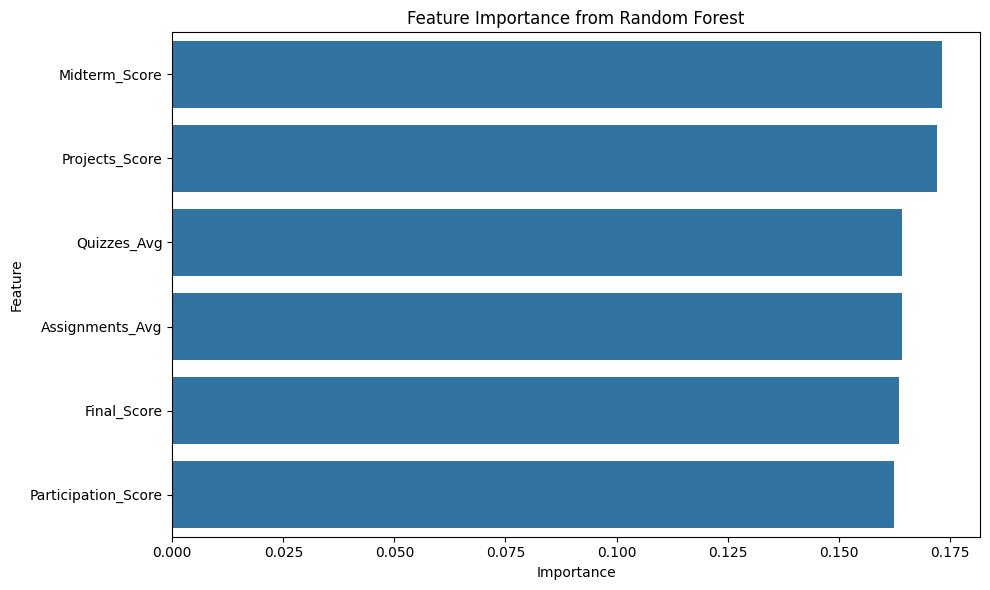

In [21]:
# Assuming model_rf is trained already on X_filled and y
importances = model_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot it
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

# Cross validation

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Re-initialize your Random Forest with current parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", np.mean(cv_scores))

Cross-validated R² scores: [-0.02295988 -0.05044754 -0.06179637 -0.04730417 -0.06530203]
Average R² score: -0.049561996618721696


R^2 is -0.054 which means the random forest model is overfitting — it's performing great on the training data (R² = 0.85), but when we test it on unseen data using cross-validation, it performs worse than a horizontal line (which would have R² = 0).


# KNN Impact

In [23]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Retain and Cross Validation Again

In [24]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, X_imputed, y, cv=5, scoring='r2')

print("Cross-validated R² scores after KNN Imputation:", cv_scores)
print("Average R² score:", np.mean(cv_scores))

Cross-validated R² scores after KNN Imputation: [-0.02295988 -0.05044754 -0.06179637 -0.04730417 -0.06530203]
Average R² score: -0.049561996618721696


The model is struggling because of missing values. It is possible that the independent features do not carry enough useful information to predict the target. 

# Checking Target distribution 

<Axes: xlabel='Total_Score', ylabel='Count'>

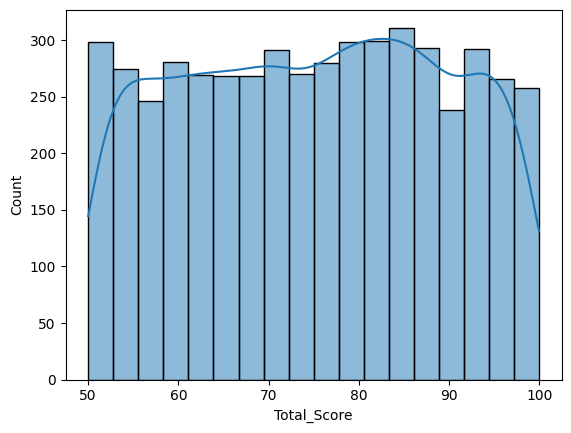

In [25]:
sns.histplot(y, kde=True)

Cross-validated R² scores are all negative, which suggests that the model is performing worse than a simple mean predictor. Hence, the model doesn't generalise well and there is nno use by applying KNN imputation.

# try similar model

In [26]:
from sklearn.linear_model import RidgeCV, LassoCV
ridge = RidgeCV(alphas=[0.01, 0.1, 1, 10])
lasso = LassoCV(cv=5)

ridge.fit(X_imputed, y)
lasso.fit(X_imputed, y)

print("Ridge R²:", ridge.score(X_imputed, y))
print("Lasso R²:", lasso.score(X_imputed, y))

Ridge R²: 0.0014766250419021576
Lasso R²: 0.0


This means Ridge was barely better than a flat average guess. It’s doing about the same as Linear Regression (which had R² ~0.0015 too). Lasso shrunk the coefficients to zero – literally saying None of these features matter enough to be included